In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
xgb_forecast = pd.read_csv(r'C:\Users\Emincan\Desktop\Gdz\gdz-competition\Büyük Modeller\XGBoost\Predicts-Images\XGB-2400-maxd9-lr01-gamma03-colsamp0.85-subsamp0.77.csv' , parse_dates=['Tarih'] , index_col='Tarih')
xgb_forecast

,Dağıtılan Enerji (MWh)
Tarih,
2022-08-01 00:00:00,2338.1572
2022-08-01 01:00:00,2166.1304
2022-08-01 02:00:00,1994.3607
2022-08-01 03:00:00,1892.0680
2022-08-01 04:00:00,1844.3546
...,...
2022-08-31 19:00:00,2530.7870
2022-08-31 20:00:00,2554.3990
2022-08-31 21:00:00,2465.2770


In [3]:
lgb_forecast = pd.read_csv(r'C:\Users\Emincan\Desktop\Gdz\gdz-competition\Büyük Modeller\LightGBM\Predicts-Images\LGBM-1500-maxd13-lr015-numleav70-minchild20.csv' , parse_dates=['Tarih'] , index_col='Tarih')
lgb_forecast

,Dağıtılan Enerji (MWh)
Tarih,
2022-08-01 00:00:00,2338.378148
2022-08-01 01:00:00,2269.814308
2022-08-01 02:00:00,2152.070434
2022-08-01 03:00:00,2032.687470
2022-08-01 04:00:00,1980.631885
...,...
2022-08-31 19:00:00,2608.511780
2022-08-31 20:00:00,2626.970394
2022-08-31 21:00:00,2544.988378


In [5]:
blending_forecast = xgb_forecast * 0.6 + lgb_forecast * 0.4
blending_forecast

,Dağıtılan Enerji (MWh)
Tarih,
2022-08-01 00:00:00,2338.245579
2022-08-01 01:00:00,2207.603963
2022-08-01 02:00:00,2057.444594
2022-08-01 03:00:00,1948.315788
2022-08-01 04:00:00,1898.865514
...,...
2022-08-31 19:00:00,2561.876912
2022-08-31 20:00:00,2583.427557
2022-08-31 21:00:00,2497.161551


# Blending Forecast Visualization

In [6]:
import sys
sys.path.append(r'C:\Users\Emincan\Desktop\Gdz\gdz-competition\Önemli Scriptler')

from eval_metrics import preds_plot

In [9]:
data = pd.read_csv(r'C:\Users\Emincan\Desktop\Gdz\gdz-competition\Büyük Modeller\LightGBM\train.csv' , parse_dates=['Tarih'] , index_col='Tarih')
data

,Dağıtılan Enerji (MWh)
Tarih,
2018-01-01 00:00:00,1593.944216
2018-01-01 01:00:00,1513.933887
2018-01-01 02:00:00,1402.612637
2018-01-01 03:00:00,1278.527266
2018-01-01 04:00:00,1220.697701
...,...
2022-07-31 19:00:00,2492.489498
2022-07-31 20:00:00,2479.958245
2022-07-31 21:00:00,2485.016884


In [10]:
target_data = data[data.index.month == 8]
target_data

,Dağıtılan Enerji (MWh)
Tarih,
2018-08-01 00:00:00,2106.796778
2018-08-01 01:00:00,1936.871633
2018-08-01 02:00:00,1808.523094
2018-08-01 03:00:00,1725.237068
2018-08-01 04:00:00,1680.685169
...,...
2021-08-31 19:00:00,2538.809761
2021-08-31 20:00:00,2572.939106
2021-08-31 21:00:00,2484.682803


In [11]:
blending_forecast

,Dağıtılan Enerji (MWh)
Tarih,
2022-08-01 00:00:00,2338.245579
2022-08-01 01:00:00,2207.603963
2022-08-01 02:00:00,2057.444594
2022-08-01 03:00:00,1948.315788
2022-08-01 04:00:00,1898.865514
...,...
2022-08-31 19:00:00,2561.876912
2022-08-31 20:00:00,2583.427557
2022-08-31 21:00:00,2497.161551


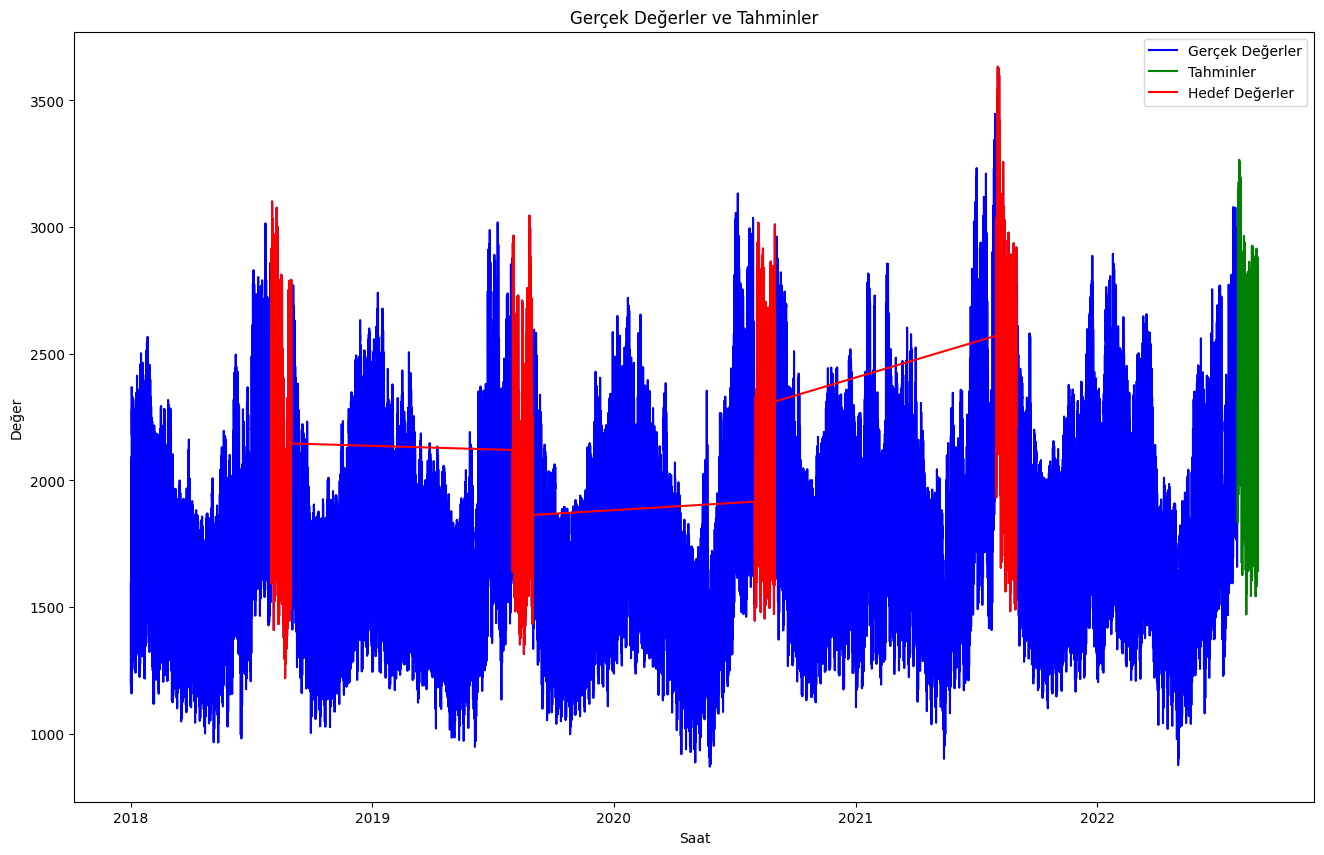

In [14]:
plt.figure(figsize=(16,10) , dpi = 100)
preds_plot(data , blending_forecast , target_data)

In [22]:
blending_forecast.reset_index(inplace=True , drop=False)

In [23]:
blending_forecast

,Tarih,Dağıtılan Enerji (MWh)
0,2022-08-01 00:00:00,2338.245579
1,2022-08-01 01:00:00,2207.603963
2,2022-08-01 02:00:00,2057.444594
3,2022-08-01 03:00:00,1948.315788
4,2022-08-01 04:00:00,1898.865514
...,...,...
739,2022-08-31 19:00:00,2561.876912
740,2022-08-31 20:00:00,2583.427557
741,2022-08-31 21:00:00,2497.161551
742,2022-08-31 22:00:00,2347.069562


In [24]:
blending_forecast.to_csv('LGBM-1500-maxd13-lr015-numleav70-minchild20x04+XGB-2400-maxd9-lr01-gamma03-colsamp0.85-subsamp0.77x06.csv' , index=None)

In [ ]:
# Done